In [1]:
from analysis import *

%matplotlib inline

# Set style for all plots
sns.set_style("whitegrid")
plt.style.use('seaborn')


/var/folders/13/81m8_c8s5x3dwyxpg6hc69nw0000gn/T/ipykernel_72973/1484485703.py:7: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


# 1. parallelization speedup ~ throughput (episodes/fixed time budget)

<Figure size 1500x1000 with 0 Axes>

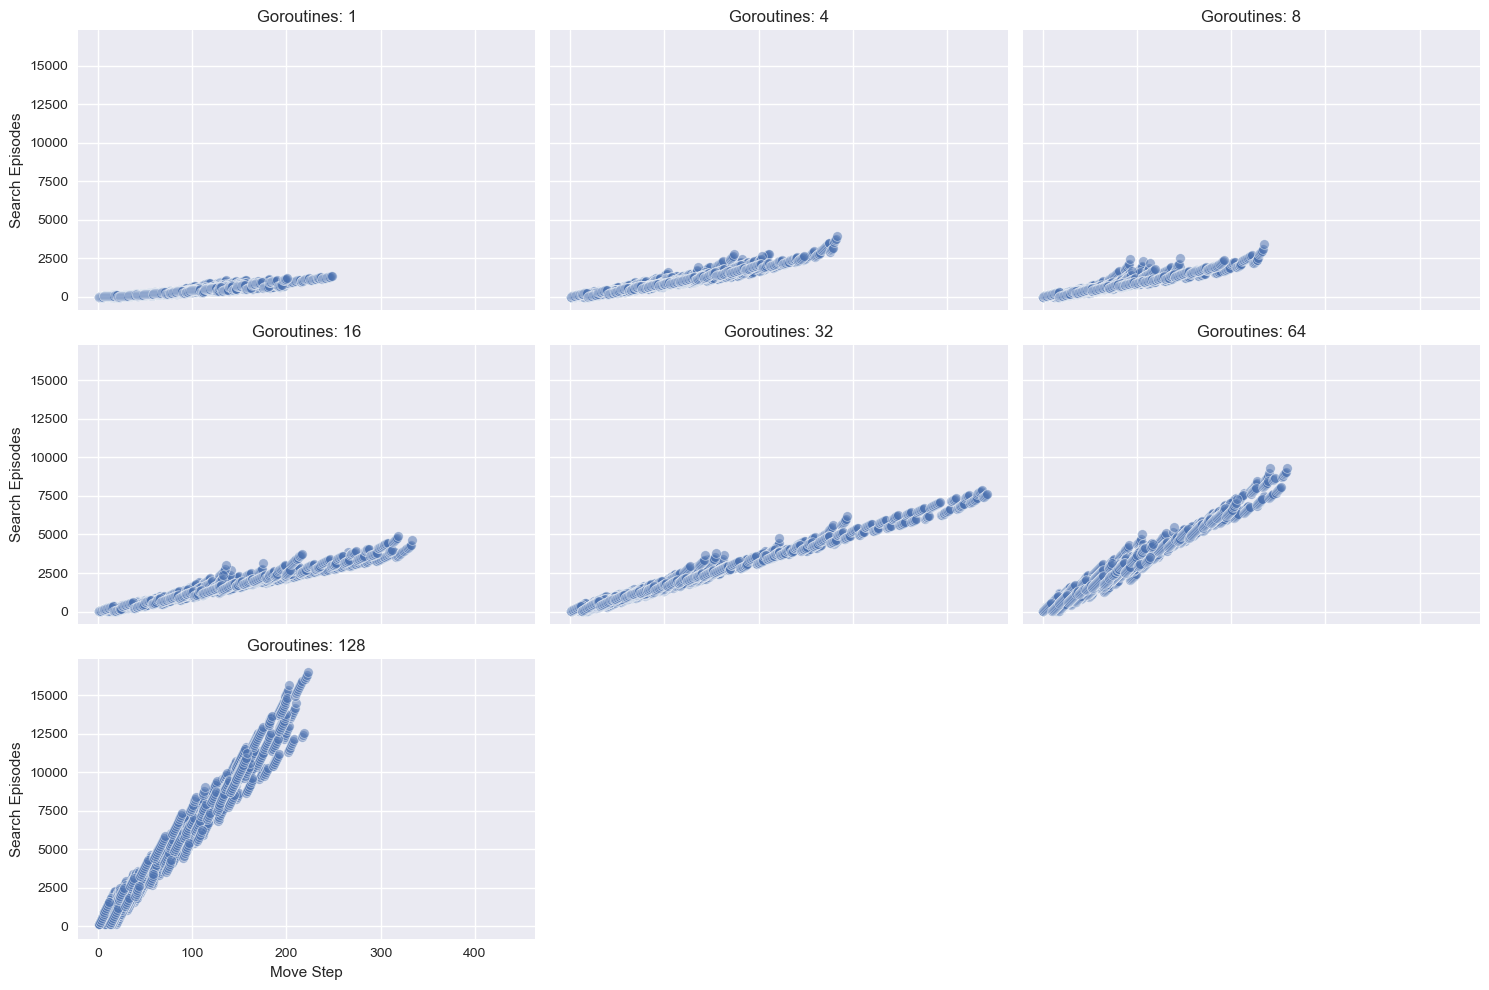

In [2]:
# Load experiment data
agent_configs, game_records, move_records, output_dir = load_experiment_data("data/parallelization_to_throughput")

# Generate plots
plt = plot_episodes_by_step(move_records, agent_configs, output_dir)
plt.show()

- environment: 8-core CPU (4 performance cores + 4 efficiency cores)
- concurrency level increase (x4) -> episodes increase both earlier in game and in volume
- full playouts (no cutoff) > faster playouts/more episodes as game progresses/deeper into game

<Figure size 1500x1000 with 0 Axes>

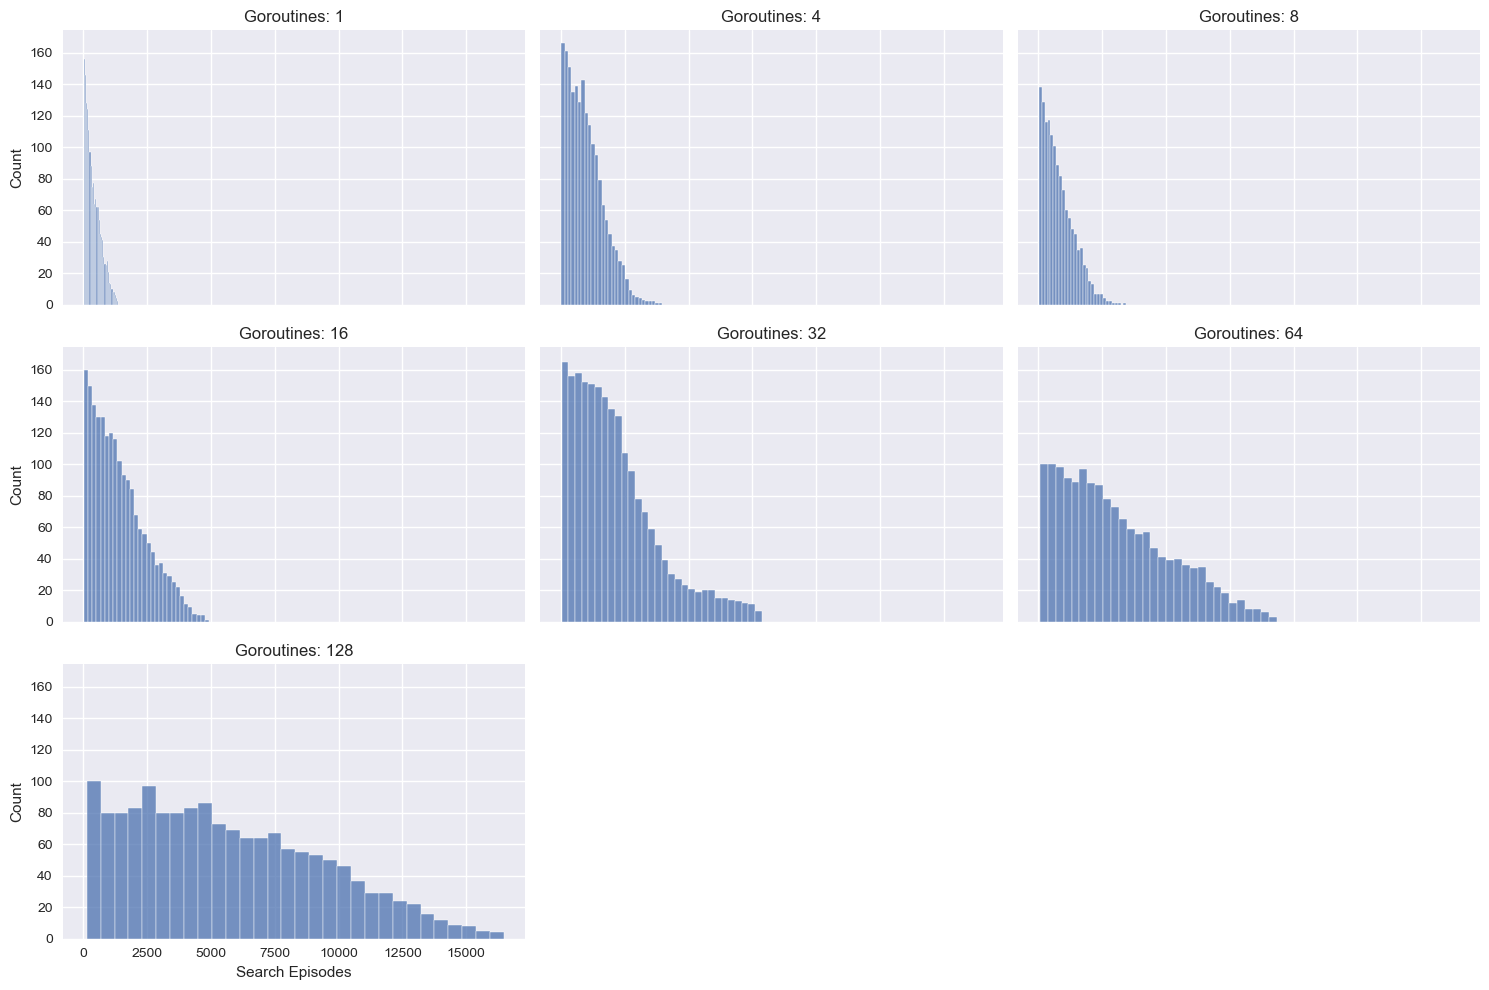

In [3]:
plt = plot_episodes_histogram(move_records, agent_configs, output_dir)
plt.show()

- all power law distribution (most searches have few episodes) > use box plot
- concurrency level increase -> more searchers with more episodes 

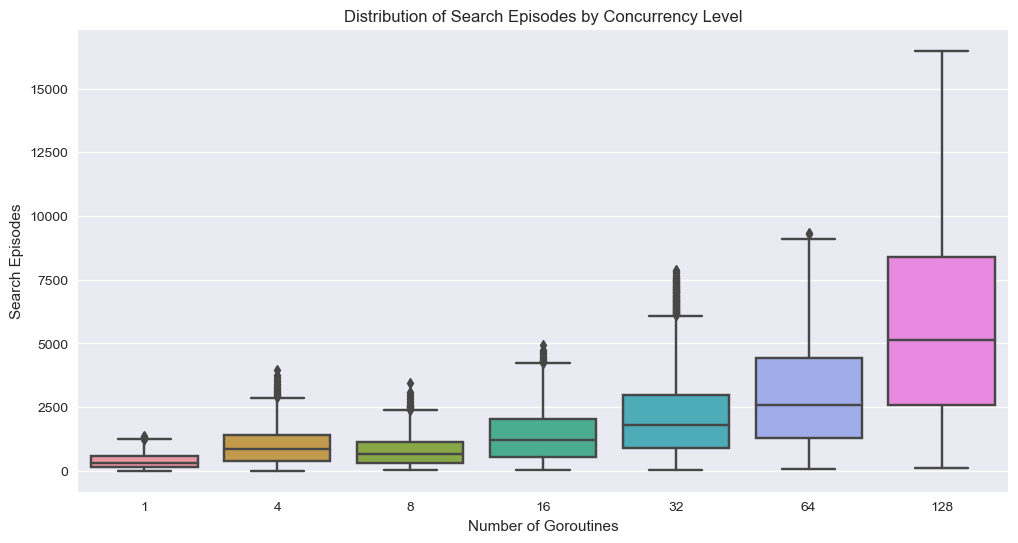


Summary Statistics by Concurrency Level:
                   mean          std  min    max
goroutines                                      
1            381.128440   300.668066    4   1372
4            965.921558   697.156579    9   3970
8            785.818046   596.637597   13   3448
16          1402.725490  1037.671830   19   4928
32          2165.289209  1676.682947   32   7868
64          3022.398427  2133.101576   64   9337
128         5696.365557  3760.504484  128  16483


In [4]:
plt = plot_episodes_boxplot(move_records, agent_configs, output_dir)
plt.show()

# Print summary statistics
print("\nSummary Statistics by Concurrency Level:")
summary = move_records.groupby('goroutines')['episodes'].agg(['mean', 'std', 'min', 'max'])
print(summary)

- higher concurrency level -> more episodes
- not much diff between 4 and 8: why?

# 2. parallelization speedup ~ throughput ~ playing strength (win rate, Elo)

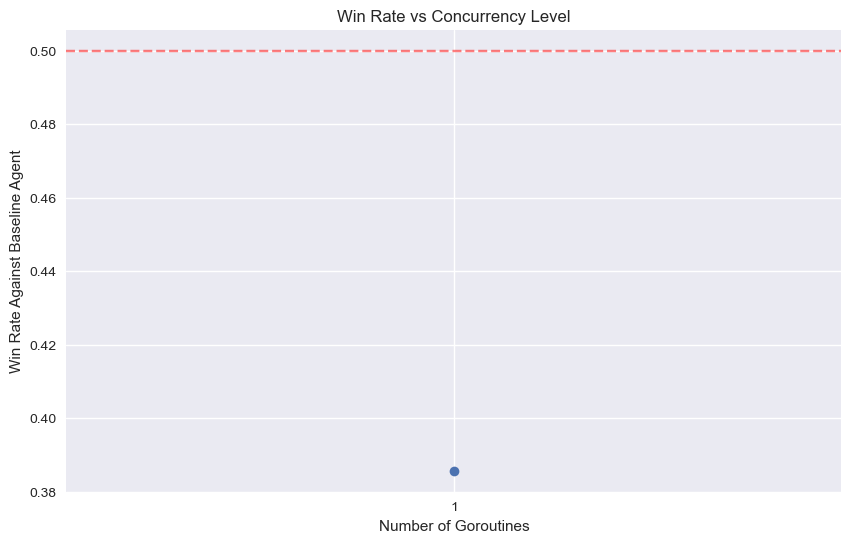


Win Rates vs Baseline Agent:
   goroutines  win_rate
0           1  0.385714


In [5]:
# Load experiment data
agent_configs, game_records, move_records, output_dir = load_experiment_data("data/parallelization_to_strength")

# Calculate and plot win rates
win_rates = calculate_win_rates(game_records, agent_configs)
plt = plot_win_rates(win_rates, output_dir)
plt.show()

print("\nWin Rates vs Baseline Agent:")
print(win_rates)


- baseline agent vs 1-goroutine agent win rate not 0.5??
- should see steady climb in win rate as concurrency level increases

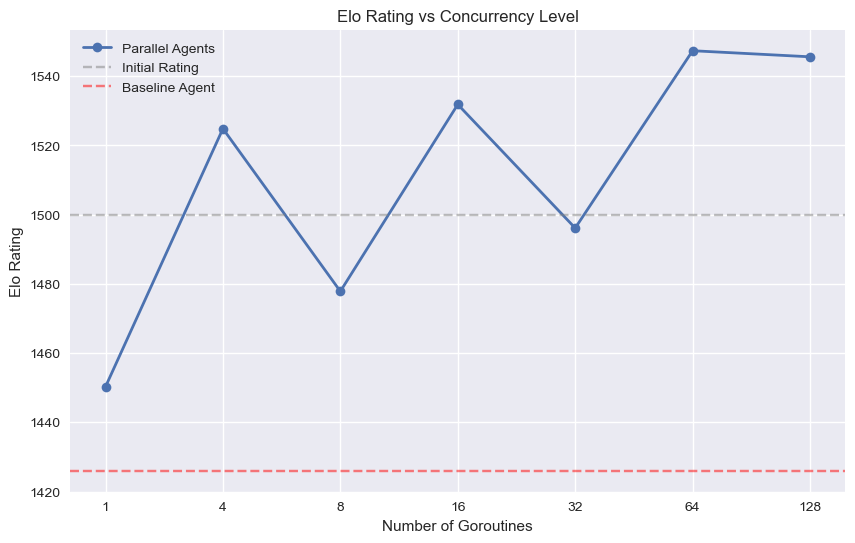


Elo Ratings:
        rating
0  1426.005143
1  1450.273449
2  1524.862239
3  1477.848184
4  1531.862290
5  1496.132650
6  1547.387400
7  1545.628644


In [6]:
# Calculate and plot Elo ratings
elo_ratings = calculate_elo_ratings(game_records)
plt = plot_elo_ratings(elo_ratings, agent_configs, output_dir)
plt.show()

print("\nElo Ratings:")
ratings_df = pd.DataFrame.from_dict(elo_ratings, orient='index', columns=['rating'])
print(ratings_df.sort_index())



- baseline agent rating dragged down by more games played against it or should still have same/similar rating as 1-goroutine agent if win rate was 0.5? 